In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [4]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [ ]:
USINFG ELBOW METHOD FIND K 

In [3]:
from sklearn.cluster import KMeans

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

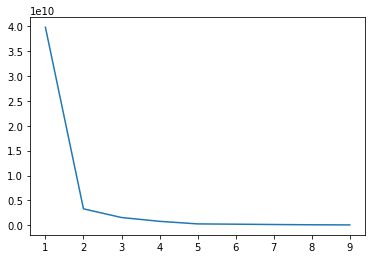

In [8]:
import matplotlib.pyplot as plt
plt.plot(k_rng,sse)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [13]:
df['SAge'] = scaler.fit_transform(df[['Age']])

In [14]:
df['SIncome($)'] = scaler.fit_transform(df[['Income($)']])

In [16]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome($)'], dtype='object')

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SAge','SIncome($)']])
    sse.append(km.inertia_)

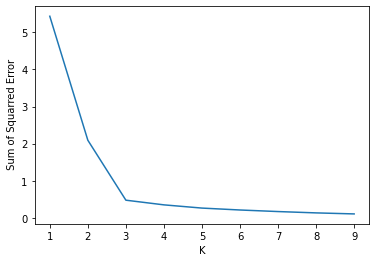

In [20]:
plt.xlabel('K')
plt.ylabel(' Sum of Squarred Error')
plt.plot(k_rng,sse)

In [22]:
km = KMeans(n_clusters=3)

In [23]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome($)'], dtype='object')

In [25]:
#km.fit_predict(df[['Age','Income($)']])

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [30]:
y_predicted = km.fit_predict(df[['SAge', 'SIncome($)']])

In [31]:
df['cluster'] = y_predicted

In [29]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [51]:
df

,Name,Age,Income($),SAge,SIncome($),cluster
0,Rob,27,70000,0.058824,0.213675,0
1,Michael,29,90000,0.176471,0.384615,0
2,Mohan,29,61000,0.176471,0.136752,0
3,Ismail,28,60000,0.117647,0.128205,0
4,Kory,42,150000,0.941176,0.897436,1
5,Gautam,39,155000,0.764706,0.940171,1
6,David,41,160000,0.882353,0.982906,1
7,Andrea,38,162000,0.705882,1.000000,1
8,Brad,36,156000,0.588235,0.948718,1
9,Angelina,35,130000,0.529412,0.726496,1


In [35]:
df.columns

Index(['Name', 'Age', 'Income($)', 'SAge', 'SIncome($)', 'cluster'], dtype='object')

In [39]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [40]:
df1

,Name,Age,Income($),SAge,SIncome($),cluster
0,Rob,27,70000,0.058824,0.213675,0
1,Michael,29,90000,0.176471,0.384615,0
2,Mohan,29,61000,0.176471,0.136752,0
3,Ismail,28,60000,0.117647,0.128205,0
11,Tom,26,45000,0.000000,0.000000,0
12,Arnold,27,48000,0.058824,0.025641,0
13,Jared,28,51000,0.117647,0.051282,0
14,Stark,29,49500,0.176471,0.038462,0
15,Ranbir,32,53000,0.352941,0.068376,0


In [41]:
df2

,Name,Age,Income($),SAge,SIncome($),cluster
4,Kory,42,150000,0.941176,0.897436,1
5,Gautam,39,155000,0.764706,0.940171,1
6,David,41,160000,0.882353,0.982906,1
7,Andrea,38,162000,0.705882,1.000000,1
8,Brad,36,156000,0.588235,0.948718,1
9,Angelina,35,130000,0.529412,0.726496,1
10,Donald,37,137000,0.647059,0.786325,1


In [42]:
df1

,Name,Age,Income($),SAge,SIncome($),cluster
0,Rob,27,70000,0.058824,0.213675,0
1,Michael,29,90000,0.176471,0.384615,0
2,Mohan,29,61000,0.176471,0.136752,0
3,Ismail,28,60000,0.117647,0.128205,0
11,Tom,26,45000,0.000000,0.000000,0
12,Arnold,27,48000,0.058824,0.025641,0
13,Jared,28,51000,0.117647,0.051282,0
14,Stark,29,49500,0.176471,0.038462,0
15,Ranbir,32,53000,0.352941,0.068376,0


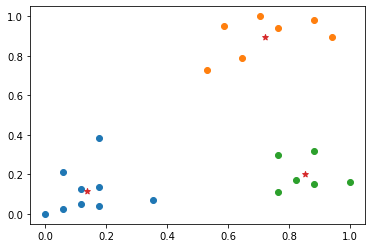

In [50]:
plt.scatter(df1.SAge,df1['SIncome($)'])
plt.scatter(df2.SAge,df2['SIncome($)'])
plt.scatter(df3.SAge,df3['SIncome($)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*')

In [47]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])